In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np

#Visualization Libraries
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline



#NLP libraries

import neattext.functions as nfx

# ML Pakgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [92]:
!pip install numpy

In [2]:
# load the data

df = pd.read_csv("data/tweet_emotions.csv")

In [3]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
#value count
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

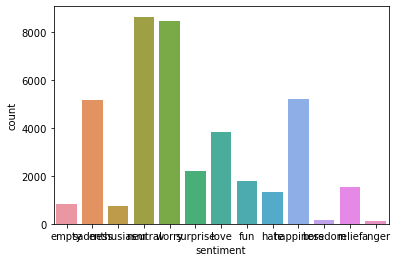

In [74]:
# Plot
sns.countplot(x='sentiment',data=df)

In [75]:
#Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [76]:
#remove user handles
df["clean_content"] = df['content'].apply(nfx.remove_userhandles)

In [77]:
#remove stop words
df["clean_content"] = df['clean_content'].apply(nfx.remove_stopwords)

In [78]:
#print dataset
df

,tweet_id,sentiment,content,clean_content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"want trade Houston tickets, will."
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...


In [79]:
xfeature = df['clean_content']
ylabel = df['sentiment']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(xfeature, ylabel, test_size= 0.3, random_state = 42)

In [81]:
#build pipeline
from sklearn.pipeline import Pipeline

In [82]:
#Logistic Regression pipeline
LR_pipeline = Pipeline(steps= [('cv', CountVectorizer()),('lr', LogisticRegression())])

In [83]:
#Train and fit the data
LR_pipeline.fit(x_train, y_train)

/Users/mrinmayeedhumane/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [91]:
LR_pipeline

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [84]:
#Accuracy check
LR_pipeline.score(x_test, y_test)

0.3343333333333333

In [85]:
#Prediction
ex = "PM died yesterday"

In [90]:
LR_pipeline.predict([ex])

array(['worry'], dtype=object)

In [71]:
#prediction probability
LR_pipeline.predict_proba([ex])

array([[0.00960614, 0.00314473, 0.01574778, 0.00749962, 0.03189377,
        0.02877726, 0.01412919, 0.05185225, 0.08806847, 0.01535752,
        0.16839027, 0.07532307, 0.49020993]])

In [72]:
#knowing the classes
LR_pipeline.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [73]:
#save the model $ pipeline
import joblib
pipeline_file = open("Sentiment_classifier_LR_Pipeline_Jan_2023.pkl", "wb")
joblib.dump(LR_pipeline, pipeline_file)
pipeline_file.close()